# Hello World!

Text(0.5, 0.98, 'Contour of the paraboloid')

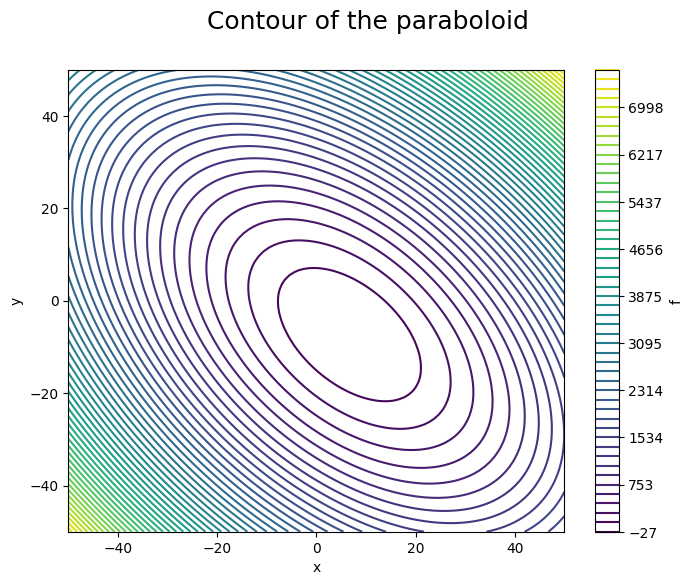

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
XX, YY = np.meshgrid(x, y)
ZZ = (XX - 3)**2 + XX * YY + (YY + 4)**2 - 3

plt.figure(figsize=(8, 6))
plt.contour(XX, YY, ZZ, levels=np.linspace(np.min(ZZ), np.max(ZZ), 50))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f')
plt.suptitle('Contour of the paraboloid', fontsize=18)

In [2]:
import openmdao.api as om

# build the model
prob = om.Problem()

prob.model.add_subsystem('paraboloid', om.ExecComp('f = (x-4)**2 + x*y + (y+3)**2 - 3'))

# setup the optimization
prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['optimizer'] = 'SLSQP'

prob.model.add_design_var('paraboloid.x', lower=-50, upper=50)
prob.model.add_design_var('paraboloid.y', lower=-50, upper=50)
prob.model.add_objective('paraboloid.f')

prob.setup()

# Set initial values.
prob.set_val('paraboloid.x', 3.0)
prob.set_val('paraboloid.y', -4.0)

# run the optimization
prob.run_driver()

print('Optimal x value: ', prob.get_val('paraboloid.x'))
print('Optimal y value: ', prob.get_val('paraboloid.y'))
print('Objective value: ', prob.get_val('paraboloid.f'))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -27.33333333298524
            Iterations: 6
            Function evaluations: 7
            Gradient evaluations: 6
Optimization Complete
-----------------------------------
Optimal x value:  [7.33332296]
Optimal y value:  [-6.66664513]
Objective value:  [-27.33333333]


In [ ]:
def func(x, y):
    val = 0.1*(x+y)-abs(np.sin(x)*np.cos(y)*np.exp((1-np.sqrt(x^2+y^2))/np.pi))
    return val

print(func(1, 1))

-0.4250520639024123


In [ ]:
import openmdao.api as om

# build the model
prob = om.Problem()

func = 'f = 0.1*(x+y)-abs(sin(x)*cos(y)*exp((1-(x**2+y**2)**(1/2))/pi))'

prob.model.add_subsystem('paraboloid', om.ExecComp(func))

# setup the optimization
prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['optimizer'] = 'SLSQP'

prob.model.add_design_var('paraboloid.x')
prob.model.add_design_var('paraboloid.y')
prob.model.add_objective('paraboloid.f')

prob.setup()

# Set initial values.
prob.set_val('paraboloid.x', -1.)
prob.set_val('paraboloid.y', -1.)

# run the optimization
prob.run_driver()

print('Optimal x value: ', prob.get_val('paraboloid.x'))
print('Optimal y value: ', prob.get_val('paraboloid.y'))
print('Objective value: ', prob.get_val('paraboloid.f'))

Rank-deficient equality constraint subproblem HFTI    (Exit mode 7)
            Current function value: -59604464178214.33
            Iterations: 24
            Function evaluations: 24
            Gradient evaluations: 24
Optimization FAILED.
Rank-deficient equality constraint subproblem HFTI
-----------------------------------
Optimal x value:  [-2.98562626e+14]
Optimal y value:  [-2.97482016e+14]
Objective value:  [-5.96044642e+13]


In [13]:
import openmdao.api as om

class Paraboloid(om.ExplicitComponent):
    def setup(self):
        self.add_input('x', val=0.0)
        self.add_input('y', val=0.0)

        self.add_output('f', val=0.0)

    def setup_partials(self):
        # Finite difference all partials
        self.declare_partials('*', '*', method='fd')

    def compute(self, inputs, outputs):
        '''
        Evaluates the equation
            f(x,y) = (x-4)**2 + x*y + (y+3)**2 - 3
        '''
        x = inputs['x']
        y = inputs['y']

        outputs['f'] = (x-4)**2 + x*y + (y+3)**2 - 3


# build the model
prob = om.Problem()
prob.model.add_subsystem('parab', Paraboloid(), promotes_inputs=['x', 'y'])

# define the component whose output will be constrained
prob.model.add_subsystem('const', om.ExecComp('g = x**2 + y'), promotes_inputs=['x', 'y'])

# Design variables 'x' and 'y' span components, so we need to provide a common initial
# value for them.
prob.model.set_input_defaults('x', 3.0)
prob.model.set_input_defaults('y', -4.0)

# setup the optimization
prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['optimizer'] = 'COBYLA'

prob.model.add_design_var('x', lower=-50, upper=50)
prob.model.add_design_var('y', lower=-50, upper=50)
prob.model.add_objective('parab.f')

# to add the constraint to the model
prob.model.add_constraint('const.g', lower=1., upper=8.)

prob.setup()
prob.run_driver()

print('Optimal x value: ', prob.get_val('parab.x'))
print('Optimal y value: ', prob.get_val('parab.y'))
print('Objective value: ', prob.get_val('parab.f'))

Return from COBYLA because the trust region radius reaches its lower bound.
Number of function values = 51   Least value of F = -16.91867213843776   Constraint violation = 3.4787639435762685e-09
The corresponding X is: [ 3.63700017 -5.22777024]
The constraint value is:
[-5.36370002e+01 -4.47722298e+01 -4.63629998e+01 -5.52277702e+01
 -7.00000000e+00  3.47876394e-09]

Optimization Complete
-----------------------------------
Optimal x value:  [3.63699711]
Optimal y value:  [-5.22774795]
Objective value:  [-16.91867214]
